<div style="border:solid orange 3px; padding: 16px">  
    <font size="4">  
        <p style="text-align: center;">
            <b> 13. Выпускной проект. Анализ эффективности торговых точек сети </b>
        </p> 
    </font>
</div>

<a id="contents"></a>
### Оглавление:
0. [Описание проекта](#0)
1. [Декомпозиция задачи](#1) 
1. [Предобработка данных](#2)
2. [Исследовательский анализ](#3)
3. [Расчет эффективности торговых точек](#4)
4. [Проверка статистических гипотез](#5)
5. [Работа с документацией](#6)
6. [Выводы и подготовка презентации](#7)

 <a id="0"></a>
### 0. Описание проекта 

Датасет содержит данные о покупках в магазине строительных материалов "Строили, строили и наконец построили". Все пользователи могут получить доступ в магазин с использованием персональных карт. Кроме того, они могут подключиться к программе лояльности и платить 200 рублей в месяц за участие в программе лояльности. В программу включены скидки, информирование о спец.предложениях, подарки.

Необходимо рассмотреть информацию о товарах и торговых точках, предложить метрику для оценки эффективности торговых точек и оценить их по этой метрике.

 <a id="1"></a>
### 1. Декомпозиция задачи


Разобьём задачу на этапы.

**2. Предобработка данных:**

    1.1 Найти и обработать дубликаты;
    1.2 Привести данные к нужным типам;
    1.3 Заполнить пропуски, если необходимо;
    1.4 Объяснить и обработать аномалии в данных:
    - нулевые и отрицательные значения в количестве товаров;
    - пропуски в id покупателя;
    - одинаковые товары с разными ценами.


**3. Исследовательский анализ:**

    2.1 Вывести распределение данных по каждому признаку (в виде графиков и/или количественных характеристик распределения);
    2.2 Добавить в отдельные столбцы час, день и неделю покупки;
    2.3 Добавить в отдельный столбец стоимость покупки;
    2.4 Определить:
    - 10 самых популярных товаров;
    - 10 товаров, приносящих наибольшую выручку.
    2.5 Сделать выводы.


**4. Расчет эффективности торговых точек:**

    3.1 Рассчитать суммарную выручку для каждой торговой точки. Выбрать топ-5 торговых точек по объёму выручки за рассматриваемый период;
    3.2 Для каждой торговой точки из топ-5 вывести средние значения за рассматриваемый период и построить графики изменения (по часам, дням, неделям) следующих метрик:
    - средний чек;
    - объём продаж (размер выручки);
    - объём продаж (количество проданных товаров);
    - среднее количество чеков в день;
    - среднее количество товаров в чеке.
    - (кол-во отказов/ возвратов; относительное количество отказов/возвратов).
    3.3 Сделать выводы.


**5. Проверка статистических гипотез:**

    4.1 Средний чек лояльных покупателей не отличается от среднего чека обычных покупателей.
    4.2 Доля возвратов у лояльных покупателей такая же, как и у обычных покупателей.
    4.3 Сделать выводы.
    
**6. Работа с документацией**
    
    Указать 5-10 источников (документация, статьи), используемых во время работы.


**7. Подготовка презентации.**
    
    Сделать главный вывод: метрика для оценки эффективности торговых точек.

<a id="2"></a>
### 2. Предобработка данных  [*(Оглавление)*](#contents)

In [ ]:
pip install statsmodels

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.dates import MO
import seaborn as sns
import numpy as np
import re
from scipy import stats as st
from statsmodels.stats.proportion import proportions_ztest

path = 'C:/Users/pavel/Desktop/da/projects/datasets/'
pd.set_option('display.max_rows', 20)

In [2]:
# таблица с проданным товаром
df = pd.read_csv(path + '13_retail_data.csv')
df.head()

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0


Файл **13_retail_data.csv**:
- `purchaseId` — id чека;
- `item_ID` — id товара;
- `purchasedate` — дата покупки;
- `Quantity` — количество товара;
- `CustomerID` — id покупателя;
- `ShopID` — id магазина;
- `loyalty_program` — участвует ли покупатель в программе лояльности.

In [3]:
# переименуем столбцы
df = df.rename(columns = {"purchaseid" : "purchase_id", 
                          "item_ID" : "item_id", 
                          "Quantity" : "quantity", 
                          "purchasedate" : "purchase_date", 
                          "CustomerID" : "customer_id", 
                          "ShopID" : "shop_id", 
                          "loyalty_program" : "loyalty"})

In [4]:
# количество полных дубликатов
df.duplicated().sum()

1033

Удалим полностью идентичные записи, т.к. скорее всего это техническая ошибка в сборе данных.

In [5]:
# удалим полностью повторяющиеся записи
df = df.drop_duplicates().reset_index(drop = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104302 entries, 0 to 104301
Data columns (total 7 columns):
purchase_id      104302 non-null object
item_id          104302 non-null object
quantity         104302 non-null int64
purchase_date    104302 non-null object
customer_id      68154 non-null float64
shop_id          104302 non-null object
loyalty          104302 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ MB


В столбце `customer_id` содержатся пропуски. Похоже, что наличие персональной карты не обязательно для покупок в магазинах сети.

In [7]:
# заполним пропуски 0 и приведем к целочисленному типу
df['customer_id'] = df['customer_id'].fillna('0').astype('int')

In [8]:
# выведем список уникальных значений столбца customer_id с количеством записей
df['customer_id'].value_counts().head()

0        36148
18427      774
23520      751
20285      745
20990      715
Name: customer_id, dtype: int64

Приблизительно 35% всех покупок были совершены покупателями без персональных карт.

---

In [9]:
# выведем список уникальных значений столбца purchase_id с количеством записей
df['purchase_id'].value_counts()

537434     675
538071     651
538349     613
537638     601
537237     597
          ... 
C543835      1
C538121      1
539643       1
C543761      1
C537814      1
Name: purchase_id, Length: 4894, dtype: int64

In [10]:
# выведем список уникальных значений столбца item_id с количеством записей
df['item_id'].value_counts()

85123A    561
22423     497
22469     412
22720     375
85099B    372
         ... 
90095       1
85036b      1
20849       1
44228       1
84854       1
Name: item_id, Length: 3159, dtype: int64

Поскольку в id чеков и товаров записаны не только цифры, но и буквы, не будем менять тип данных для этих столбцов.

---

In [11]:
# выведем список уникальных значений столбца quantity с количеством записей
df['quantity'].value_counts()

 0       32362
 1       16137
 11      10265
 5        7931
 2        7444
         ...  
-32          1
 1823        1
 1055        1
 1151        1
 863         1
Name: quantity, Length: 301, dtype: int64

В столбце с обозначением количества купленных товаров есть отрицательные значения и нули. 

Рассмотрим подробнее чеки, в которых указано отрицательное количество товара.

In [12]:
# выведем значения количества товара в таких чеках, где есть товары с отрицательным количеством
df[df['purchase_id'].isin(df[df['quantity'] < 0]['purchase_id'])]['quantity'].sort_values()

49166    -74216
39189     -9361
103934    -2601
10683     -1431
53553     -1401
          ...  
59490        -2
59424        -2
59358        -2
59738        -2
64           -2
Name: quantity, Length: 2076, dtype: int64

Как видим, в чеках, где есть товары с отрицательным количеством, есть товары **только** с отрицательными количествами.

Поскольку нет дополнительной информации о системе сбора данных, в дальнейшем будем считать, что 0 в количестве означает возврат товара на кассе, непосредственно при покупке, а отрицательное значение означает возврат товара позже.

---

In [13]:
# приведем данные в столбце purchase_date к типу datetime
df['purchase_date'] =  pd.to_datetime(df['purchase_date'], format='%Y-%m-%d %H:%M:%S')

In [14]:
df['purchase_date'].describe()

count                  104302
unique                   4430
top       2016-12-06 16:57:00
freq                      675
first     2016-12-01 08:26:00
last      2017-02-28 17:04:00
Name: purchase_date, dtype: object

Имеем инфомацию о покупках с 8:26 1 декабря 2016 до 17:04 28 февраля 2017 года.

---

In [15]:
# выведем список уникальных значений столбца shop_id с количеством записей
df['shop_id'].value_counts()

Shop 0     96370
Shop 4      1739
Shop 1      1540
Shop 6      1030
Shop 8       560
           ...  
Shop 28       30
Shop 20       30
Shop 30       15
Shop 29        9
Shop 23        2
Name: shop_id, Length: 31, dtype: int64

Имеем информацию о 31 торговой точке.

In [16]:
# для каждой записи в столбце 'shop_id' удалим "Shop " и приведем к целочисленному типу
df['shop_id'] = df.apply(lambda x: re.sub('Shop ', '', x['shop_id']), axis = 1).astype('int')

---

In [17]:
# приведем данные в столбце loyalty к целочисленному типу
df['loyalty'] = df['loyalty'].astype('int')

In [18]:
df.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty
0,538280,21873,11,2016-12-10 12:50:00,18427,0,0
1,538862,22195,0,2016-12-14 14:11:00,22389,0,1
2,538855,21239,7,2016-12-14 13:50:00,22182,0,1
3,543543,22271,0,2017-02-09 15:33:00,23522,0,1
4,543812,79321,0,2017-02-13 14:40:00,23151,0,1


---

In [19]:
# таблица со стоимостью товаров
codes = pd.read_csv(path + '13_product_codes.csv')
codes.head()

,productID,price_per_one
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39


Файл **13_product_codes.csv**:
- `productID` — id товара;
- `price_per_one` — стоимость одной единицы товара.

In [20]:
# переименуем столбцы
codes = codes.rename(columns = {"productID" : "product_id", 
                                "price_per_one" : "price"})

In [21]:
# количество полных дубликатов
codes.duplicated().sum()

0

In [22]:
codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 2 columns):
product_id    9969 non-null object
price         9969 non-null float64
dtypes: float64(1), object(1)
memory usage: 155.9+ KB


Нет пропусков и полных дубликатов. Данные приведены к нужным типам.

---

In [23]:
# выведем список уникальных значений столбца product_id с количеством записей
codes['product_id'].value_counts()

DOT       174
M          59
S          29
POST       15
D          13
         ... 
22708       1
20702       1
21538       1
84993a      1
90001C      1
Name: product_id, Length: 3159, dtype: int64

Видим, что в таблице содержатся записи с одинаковыми `product_id`, но разной ценой (т.к. нет полных дубликатов). Это может быть объяснено тем, что одинаковые товары продавались в магазинах сети по разным ценам. По имеющимся данным нельзя однозначно сказать, сколько стоил товар на момент покупки.

Создадим новую таблицу, куда запишем уникальные коды товаров с ценой. 

In [24]:
# зададим названия столбцов и пустой Series
columns = ['item_id', 'median_price']
set = []

# для каждого кода из списка уникальных product_id
for code in list(codes['product_id'].unique()):
    
    # добавим в датасет строку с обозначением кода и его медианной ценой 
    set.append([code, codes.loc[codes.loc[:,'product_id'] == code]['price'].median()])

# создадим новый датафрейм    
prices = pd.DataFrame(data = set, columns = columns)

In [25]:
# размеры старой таблицы с ценами
codes.shape

(9969, 2)

In [26]:
# размеры новой таблицы с ценами
prices.shape

(3159, 2)

In [27]:
prices.head()

,item_id,median_price
0,85123A,3.095
1,71053,6.020
2,84406B,3.625
3,84029G,7.540
4,84029E,5.605


In [28]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
item_id         3159 non-null object
median_price    3159 non-null float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


В полученной таблице каждому id товара соответствует одна цена. Будем считать, что product_id в разных регистрах, например `m` и `M`, или с одинаковыми номерами но разной буквенной частью, например `15044A` и `15044B` обозначают разные товары и/или продаются по разной цене.

<a id="3"></a>
### 3. Исследовательский анализ  [*(Оглавление)*](#contents)

Добавим в таблицу с продажами столбец с указанием стоимости единицы товара. Будем считать, что стоимость указана в рублях.

In [29]:
# объединим датасеты по item_id
df = pd.merge(df, prices, on='item_id', how = 'left')

In [30]:
df.head(3)

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty,median_price
0,538280,21873,11,2016-12-10 12:50:00,18427,0,0,1.63
1,538862,22195,0,2016-12-14 14:11:00,22389,0,1,3.29
2,538855,21239,7,2016-12-14 13:50:00,22182,0,1,1.63


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104302 entries, 0 to 104301
Data columns (total 8 columns):
purchase_id      104302 non-null object
item_id          104302 non-null object
quantity         104302 non-null int64
purchase_date    104302 non-null datetime64[ns]
customer_id      104302 non-null int32
shop_id          104302 non-null int32
loyalty          104302 non-null int32
median_price     104302 non-null float64
dtypes: datetime64[ns](1), float64(1), int32(3), int64(1), object(2)
memory usage: 6.0+ MB


После объединения нет пропусков, значит для каждого товара из таблицы продаж указана цена.

---

Добавим столбец с указанием "выручки" от операции, как произведения количества товара на цену единицы товара. Это значение будет являться выручкой лишь условно, т.к. она будет принимать в том числе нулевые и отрицательные значения.

In [32]:
df['revenue'] = df['quantity'] * df['median_price']

In [33]:
df.head(3)

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty,median_price,revenue
0,538280,21873,11,2016-12-10 12:50:00,18427,0,0,1.63,17.93
1,538862,22195,0,2016-12-14 14:11:00,22389,0,1,3.29,0.00
2,538855,21239,7,2016-12-14 13:50:00,22182,0,1,1.63,11.41


---

Добавим столбцы с указанием часа, дня и недели (первого дня недели) для каждой операции.

In [34]:
df['hour'] =  df['purchase_date'].dt.hour

In [35]:
df['date'] =  df['purchase_date'].dt.date

In [36]:
df['week'] = df['purchase_date'].astype('datetime64[D]') - pd.to_timedelta(df['purchase_date'].dt.dayofweek, unit='d')

In [37]:
df.head(3)

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty,median_price,revenue,hour,date,week
0,538280,21873,11,2016-12-10 12:50:00,18427,0,0,1.63,17.93,12,2016-12-10,2016-12-05
1,538862,22195,0,2016-12-14 14:11:00,22389,0,1,3.29,0.00,14,2016-12-14,2016-12-12
2,538855,21239,7,2016-12-14 13:50:00,22182,0,1,1.63,11.41,13,2016-12-14,2016-12-12


---

Рассмотрим, как распределены суммы покупок и возвратов.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


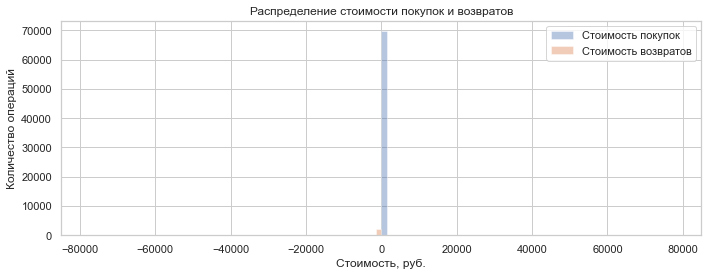

In [38]:
sns.set(style = 'whitegrid')

# гистограммы распределения стоимости покупок
f, ax = plt.subplots(figsize=(10, 4))

sns.distplot(df.query('revenue > 0')['revenue'], kde = False, label = 'Стоимость покупок')
sns.distplot(df.query('revenue < 0')['revenue'], kde = False, label = 'Стоимость возвратов')

ax.set(xlabel = 'Стоимость, руб.', ylabel = 'Количество операций', title = 'Распределение стоимости покупок и возвратов')
ax.legend()
plt.tight_layout()

Отобразим стоимость заказов в виде точечной диаграммы распределения.

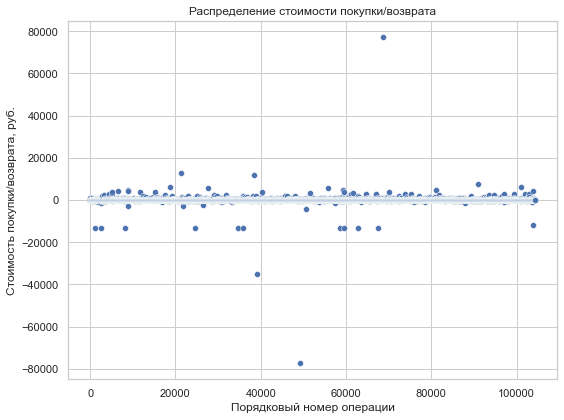

In [39]:
# создадим набор чисел от 0 до количества заказов
x_values = pd.Series(range(0,len(df['revenue'])))

f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x = x_values, y = "revenue", data = df)

ax.set(xlabel = 'Порядковый номер операции', ylabel = 'Стоимость покупки/возврата, руб.',
       title = 'Распределение стоимости покупки/возврата')
plt.tight_layout()

Видим несколько выбросов. Рассмотрим эти операции подробнее.

In [40]:
df.query('revenue > 20000 or revenue < -20000')

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty,median_price,revenue,hour,date,week
39189,C536757,84347,-9361,2016-12-02 14:23:00,21517,0,0,3.755,-35150.555,14,2016-12-02,2016-11-28
49166,C541433,23166,-74216,2017-01-18 10:17:00,18025,0,0,1.040,-77184.640,10,2017-01-18,2017-01-16
68612,541431,23166,74214,2017-01-18 10:01:00,18025,0,0,1.040,77182.560,10,2017-01-18,2017-01-16


Удалим эти записи. Скорее всего эти операции были соверешены по ошибке.

In [41]:
df = df.query('revenue < 20000 and revenue > -20000')

---

Вычислим сумму выручки с группировкой по чекам.

In [42]:
purchases = df.groupby('purchase_id')['revenue'].sum().reset_index()

In [43]:
# количество чеков
purchases.shape

(4891, 2)

In [44]:
purchases.head(3)

,purchase_id,revenue
0,536365,186.515
1,536366,19.750
2,536367,285.395


Отобразим стоимости покупок и возвратов в виде точечной диаграммы распределения.

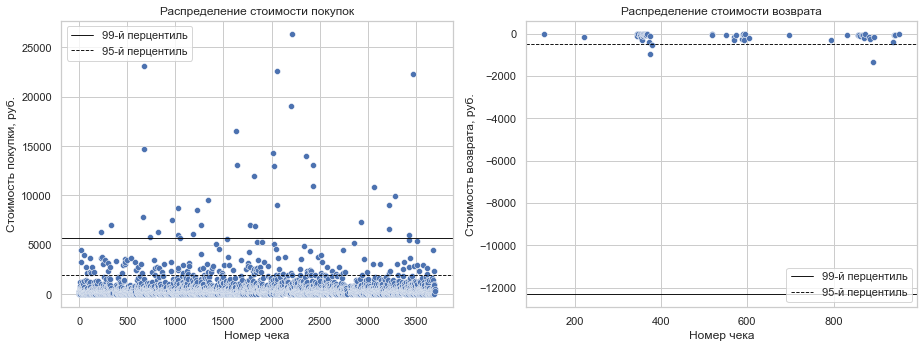

In [45]:
f, axes = plt.subplots(1, 2, figsize=(13, 5))

sns.scatterplot(x = pd.Series(range(0,len(purchases.query('revenue > 0')['revenue']))), 
                y = purchases.query('revenue > 0')['revenue'], ax=axes[0])

axes[0].axhline(y=np.percentile(purchases.query('revenue > 0')['revenue'], [95, 99])[1], 
            color='black', linestyle='-', linewidth = 0.9, label = '99-й перцентиль')

axes[0].axhline(y=np.percentile(purchases.query('revenue > 0')['revenue'], [95, 99])[0], 
            color='black', linestyle='--', linewidth = 0.9, label = '95-й перцентиль')


sns.scatterplot(x = pd.Series(range(0,len(purchases.query('revenue < 0')['revenue']))), 
                y = purchases.query('revenue < 0')['revenue'], ax=axes[1])

axes[1].axhline(y=-np.percentile(abs(purchases.query('revenue < 0')['revenue']), [95, 99])[1], 
            color='black', linestyle='-', linewidth = 0.9, label = '99-й перцентиль')

axes[1].axhline(y=-np.percentile(abs(purchases.query('revenue < 0')['revenue']), [95, 99])[0], 
            color='black', linestyle='--', linewidth = 0.9, label = '95-й перцентиль')

axes[0].set(xlabel = 'Номер чека', ylabel = 'Стоимость покупки, руб.', title = 'Распределение стоимости покупок')  
axes[0].legend(loc='upper left')

axes[1].set(xlabel = 'Номер чека', ylabel = 'Стоимость возврата, руб.', title = 'Распределение стоимости возврата')
axes[1].legend(loc='lower right')

plt.tight_layout()

Удалим из рассмотрения аномальные значения стоимости покупок (больше 10000) и возвратов (меньше -10000).

In [46]:
purchases.query('revenue >10000 or revenue <-10000')

,purchase_id,revenue
672,537657,14748.085
674,537659,23093.560
1626,539731,16541.335
1645,539750,13119.430
1816,540267,11966.815
...,...,...
4164,C537652,-13413.420
4420,C540117,-13413.420
4421,C540118,-13413.420
4858,C544587,-13413.420


При этом лишимся информации о ~0,6% чеков (28 из 4891).

In [47]:
# операции, входящие в эти чеки
df[df['purchase_id'].isin(purchases.query('revenue >10000 or revenue <-10000')['purchase_id'])]

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty,median_price,revenue,hour,date,week
53,541220,22936,71,2017-01-14 14:11:00,19835,6,0,3.250,230.750,14,2017-01-14,2017-01-09
99,541570,22630,383,2017-01-19 12:34:00,20325,3,0,2.485,951.755,12,2017-01-19,2017-01-16
218,540267,21238,95,2017-01-06 11:12:00,18094,2,0,1.645,156.275,11,2017-01-06,2017-01-02
274,541711,22773,11,2017-01-21 11:18:00,20325,3,0,1.975,21.725,11,2017-01-21,2017-01-16
380,541711,21216,23,2017-01-21 11:18:00,20325,3,0,7.870,181.010,11,2017-01-21,2017-01-16
...,...,...,...,...,...,...,...,...,...,...,...,...
103934,540564,22617,-2601,2017-01-10 10:36:00,0,0,0,4.600,-11964.600,10,2017-01-10,2017-01-09
104031,541206,21218,95,2017-01-14 12:24:00,20325,3,0,6.020,571.900,12,2017-01-14,2017-01-09
104173,541570,85049C,143,2017-01-19 12:34:00,20325,3,0,1.855,265.265,12,2017-01-19,2017-01-16
104279,539750,22734,20,2016-12-21 15:40:00,0,0,0,5.060,101.200,15,2016-12-21,2016-12-19


In [48]:
# удалим записи с аномальными значениями выручки
df = df[~df['purchase_id'].isin(purchases.query('revenue >10000 or revenue <-10000')['purchase_id'])]

---

Построим графики суммарной выручки в день по всем магазинам. Один из графиков будет учитывать стоимость возвратов, а другой нет.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


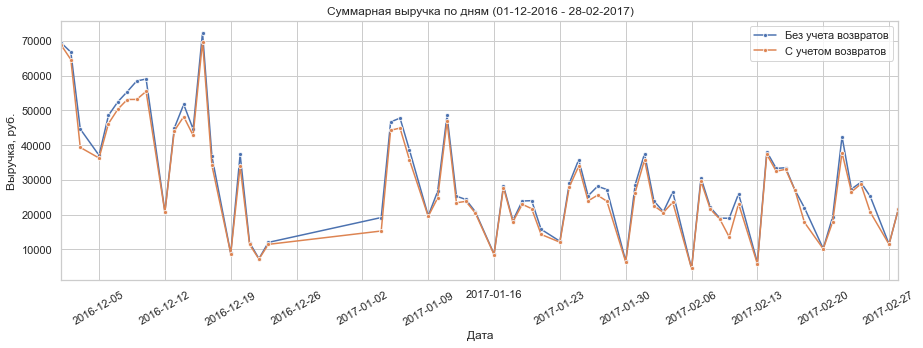

In [49]:
f, ax = plt.subplots(figsize=(13, 5))

sns.lineplot(x = df['date'].sort_values(ascending = True).unique(), 
             y = df.query('revenue > 0').groupby('date')['revenue'].sum(), label = 'Без учета возвратов',
             marker = 'o', markersize = 4, linewidth = 1.5)

sns.lineplot(x = df['date'].sort_values(ascending = True).unique(), 
             y = df.groupby('date')['revenue'].sum(), label = 'С учетом возвратов',
             marker = 'o', markersize = 4, linewidth = 1.5)

ax.set(xlabel = 'Дата', ylabel = 'Выручка, руб.', title = 'Суммарная выручка по дням (01-12-2016 - 28-02-2017)',
       xlim = ('2016-12-01', '2017-02-28'))

plt.xticks(rotation = 30, horizontalalignment = 'center')

date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval = 1))
 
ax.legend()

plt.tight_layout()

Видим недельные циклы работы магазинов, новогодние выходные, несколько крупных возвратов сразу после новогодних праздников. В целом наблюдается сезонность: всплеск активности до и после нового года; относительный упадок и постепенный рост выручки начиная со второй половины января.

---

Построим график суммарной выручки по всем магазинам по часам дня.

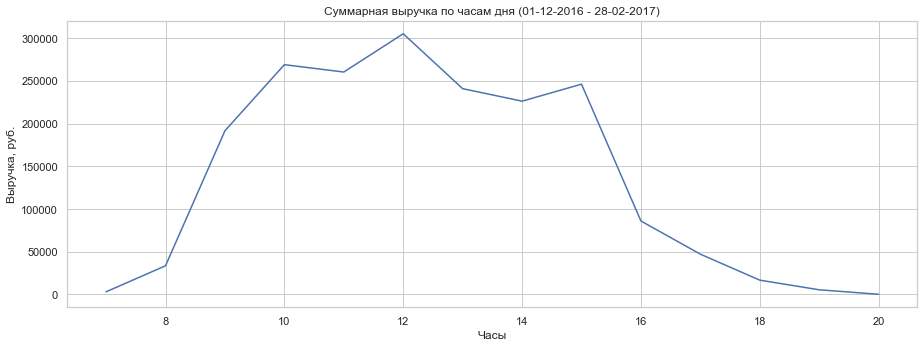

In [50]:
f, ax = plt.subplots(figsize=(13, 5))

sns.lineplot(x = df['hour'].sort_values(ascending = True).unique(), y = df.groupby('hour')['revenue'].sum())

ax.set(xlabel = 'Часы', ylabel = 'Выручка, руб.', title = 'Суммарная выручка по часам дня (01-12-2016 - 28-02-2017)')

plt.tight_layout()

Часы наибольшей активности покупателей: с 9 до 16.

---

Определим товары, которые покупали чаще всего в исследуемый период.

In [51]:
df.groupby('item_id')['quantity'].sum().sort_values(ascending = False).reset_index().head(5)

,item_id,quantity
0,84077,10126
1,21212,7129
2,85099B,6975
3,22197,6918
4,22693,6830


Определим товары, которые принесли наибольшую выручку за исследуемый период.

In [52]:
df.groupby('item_id')['revenue'].sum().sort_values(ascending = False).reset_index().head(5)

,item_id,revenue
0,22423,37058.850
1,85123A,21080.045
2,79321,19394.750
3,21137,15178.340
4,21479,14442.560


Определим товары, которые чаще всего возвращали за исследуемый период.

In [53]:
df.groupby('item_id')['quantity'].sum().sort_values().reset_index().head(5)

,item_id,quantity
0,22351,-1390
1,72038P,-991
2,84614A,-390
3,35957,-356
4,20956,-330


<a id="4"></a>
### 4. Расчет эффективности торговых точек  [*(Оглавление)*](#contents)

Определим 5 торговых точек с наибольшей суммарной выручкой за исследуемый период. Далее будем рассматривать только эти 5 точек. 

In [54]:
# номер торговой точки и её суммарная выручка
top_5 = df.groupby('shop_id')['revenue'].sum().sort_values(ascending = False).reset_index().head(5)
top_5

,shop_id,revenue
0,0,1663832.885
1,4,50533.035
2,1,48030.905
3,6,29503.185
4,14,22153.325


In [55]:
# зададим функцию для отображения значений на графиках 
def _show_values_on_bars(ax, space = 0.4, decimal = 0):
    for p in ax.patches:
        _x = p.get_x() + p.get_width() / 2
        _y = p.get_y() + p.get_height() + float(space)
        if decimal == 0:
            value = int(p.get_height())
        else:
            value = round(p.get_height(), decimal)
        ax.text(_x, _y, value, ha = "center")

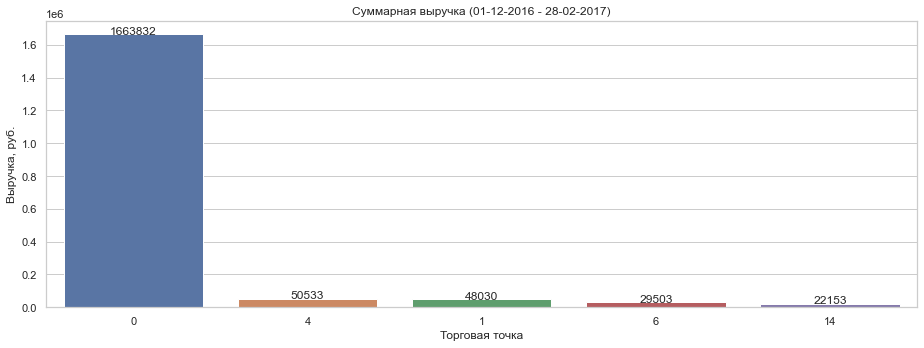

In [56]:
f, ax = plt.subplots(figsize=(13, 5))

labels = top_5['shop_id']

x = np.arange(len(labels))  
 
sns.barplot(x = x, y = df.groupby('shop_id')['revenue'].sum().sort_values(ascending = False).head(5))

ax.set(xlabel = 'Торговая точка', ylabel = 'Выручка, руб.', title = 'Суммарная выручка (01-12-2016 - 28-02-2017)')

ax.set_xticks(x)
ax.set_xticklabels(labels)

_show_values_on_bars(ax, 2000, 0)

plt.tight_layout()

Суммарная выручка магазина 0 в ~30 раз больше суммарной выручки магазина 4 и остальных магазинов сети. Значительные отличия в абсолютных показателях  затрудняют сраванительный анализ, будем больше использовать относительные и средние метрики.

---

Рассмотрим изменение дневной выручки для каждой из точек. 

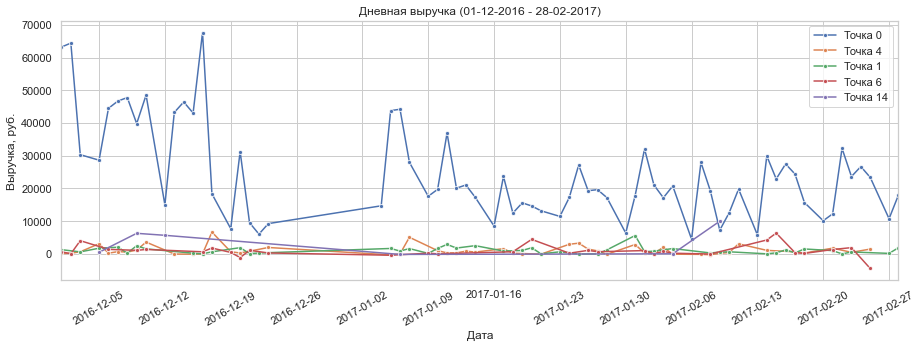

In [57]:
f, ax = plt.subplots(figsize=(13, 5))

for shop in list(top_5['shop_id']):

    sns.lineplot(x = df[df['shop_id'] == shop]['date'].sort_values(ascending = True).unique(), 
                 y = df[df['shop_id'] == shop].groupby('date')['revenue'].sum(), label = 'Точка '+str(shop), marker = 'o',
                 markersize = 4, linewidth = 1.5)

ax.set(xlabel = 'Дата', ylabel = 'Выручка, руб.', title = 'Дневная выручка (01-12-2016 - 28-02-2017)',
       xlim = ('2016-12-01', '2017-02-28'))

plt.xticks(rotation = 30, horizontalalignment = 'center')

date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval = 1))
 
ax.legend()

plt.tight_layout()

1. Видим значительное превышение дневной выручки у точки 0 по сравнению с остальными. 
1. Дневная выручка некоторых точек в некоторые дни отрицательная. 

---

Рассмотрим изменение недельной выручки для каждой из точек. 

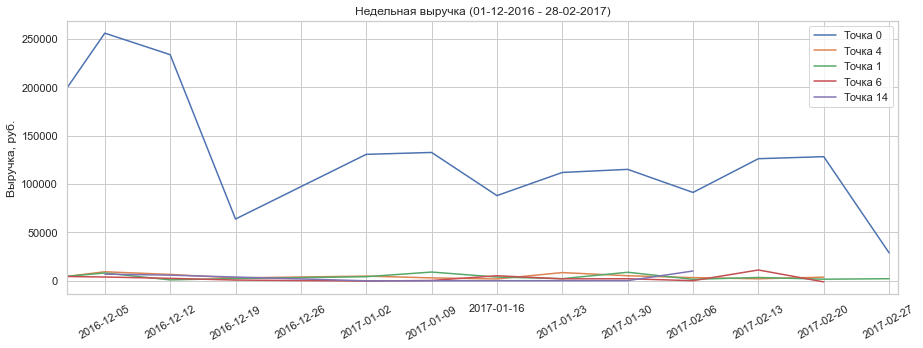

In [58]:
f, ax = plt.subplots(figsize=(13, 5))

for shop in list(top_5['shop_id']):

    sns.lineplot(x = df[df['shop_id'] == shop]['week'].sort_values(ascending = True).unique(), 
                 y = df[df['shop_id'] == shop].groupby('week')['revenue'].sum(), label = 'Точка '+str(shop))
    
ax.set(xlabel = '', ylabel = 'Выручка, руб.', title = 'Недельная выручка (01-12-2016 - 28-02-2017)',
       xlim = ('2016-12-01', '2017-02-28'))

plt.xticks(rotation = 30, horizontalalignment = 'center')

date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval = 1))
 
ax.legend()

plt.tight_layout()

Видим значительное превышение дневной выручки у точки 0 по сравнению с остальными. 

---

Сгруппируем инфомарцию об операциях по чекам, выведем сумму чека, количество товаров в нем, id торговой точки, дату совершения покупки/возврата, указание об участии в программе лояльности.

In [59]:
check = df.groupby('purchase_id').agg({'revenue':'sum', 
                                              'quantity':'sum', 
                                              'shop_id':'first', 
                                              'date':'first', 
                                              'week':'first',
                                              'loyalty':'first'}).reset_index()
check.columns = ['purchase_id', 'revenue', 'quantity', 'shop_id', 'date', 'week', 'loyalty']
check

,purchase_id,revenue,quantity,shop_id,date,week,loyalty
0,536365,186.515,33,0,2016-12-01,2016-11-28,1
1,536366,19.750,10,0,2016-12-01,2016-11-28,1
2,536367,285.395,71,0,2016-12-01,2016-11-28,0
3,536368,96.090,11,0,2016-12-01,2016-11-28,0
4,536369,13.200,2,0,2016-12-01,2016-11-28,0
...,...,...,...,...,...,...,...
4858,C545003,-32.455,-15,0,2017-02-25,2017-02-20,1
4859,C545033,-4497.495,-678,6,2017-02-25,2017-02-20,0
4860,C545040,-11.820,-2,0,2017-02-27,2017-02-27,0
4861,C545068,-35.400,-12,0,2017-02-27,2017-02-27,0


---

Вычислим среднюю недельную выручку для каждой из точек. 

Создадим таблицу, где для каждой торговой точки указана суммарная выручка за неделю с учетом возвратов.

In [60]:
# зададим названия столбцов и пустой Series
columns = pd.Series('week')
columns = columns.append(pd.Series(check['shop_id'].unique()))

set = []

for week in list(check['week'].unique()):
    line = [week]
    for shop in list(check['shop_id'].unique()):
        line.append(check[(check['shop_id'] == shop) & (check['week'] == week)]['revenue'].sum().round(1))
    set.append(line)

#создадим новый датафрейм    
week_revenue = pd.DataFrame(data = set, columns = columns)
week_revenue = week_revenue.set_index('week')


In [61]:
week_revenue

,0,1,2,3,4,5,6,7,8,9,...,20,23,21,24,25,26,27,28,29,30
week,,,,,,,,,,,,,,,,,,,,,
2016-11-28,157993.0,1841.2,433.8,295.9,881.4,2744.5,4643.3,391.8,1636.5,478.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-12-05,255983.6,7901.2,618.9,0.0,9169.2,2681.8,3732.0,0.0,111.6,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-12-12,233725.7,763.0,442.6,0.0,6423.8,0.0,2369.5,0.0,1194.1,0.0,...,194.7,0.0,-280.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-12-19,63713.2,2176.7,0.0,40.8,2803.2,0.0,580.2,1346.8,0.0,0.0,...,0.0,225.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-02,130624.7,4050.6,166.1,0.0,4693.0,0.0,-441.3,0.0,1139.0,0.0,...,0.0,-233.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-09,132586.5,8870.2,1141.7,0.0,2835.5,0.0,161.4,0.0,7745.6,0.0,...,0.0,0.0,500.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-16,87953.7,3688.5,1052.9,530.5,1717.3,0.0,5031.2,5755.9,1111.4,1101.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-23,111890.2,2024.5,436.6,0.0,8324.9,0.0,1854.4,714.3,1910.6,0.0,...,0.0,0.0,0.0,3984.6,3234.3,2775.6,2095.5,0.0,0.0,0.0
2017-01-30,115091.8,8643.3,0.0,366.4,5062.1,386.2,1936.3,642.5,857.9,496.4,...,794.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
week_revenue.mean().sort_values(ascending = False).reset_index()

,index,0
0,0,127987.146154
1,4,3887.169231
2,1,3694.669231
3,6,2269.461538
4,14,1704.107692
...,...,...
26,21,103.784615
27,20,76.076923
28,30,57.192308
29,29,15.976923


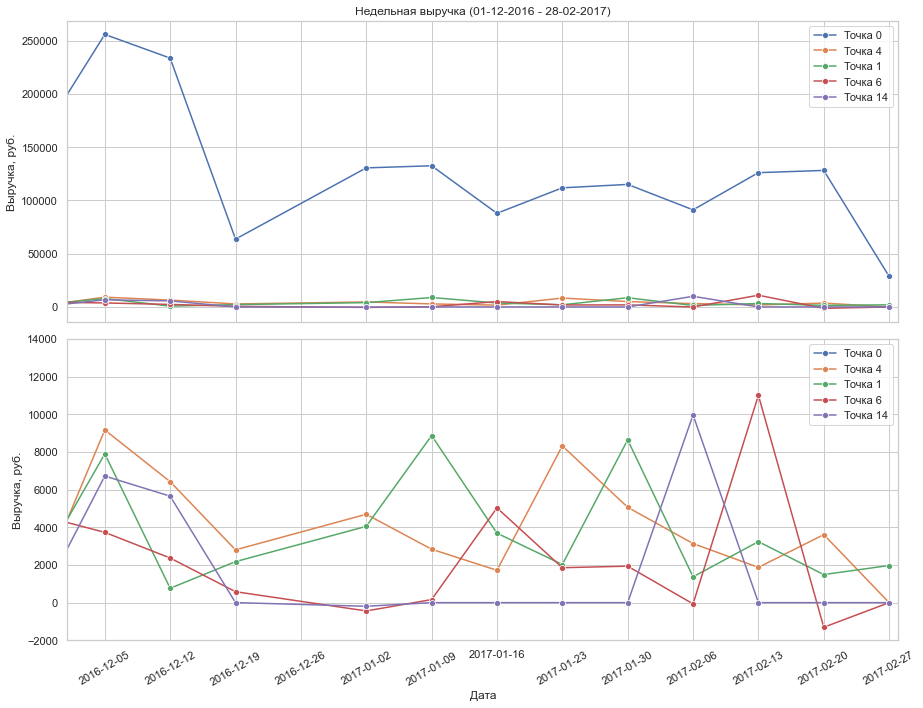

In [63]:
f, ax = plt.subplots(2, figsize=(13, 10), sharex=True)

for shop in list(top_5['shop_id']):

    sns.lineplot(x = week_revenue.index, 
                 y = week_revenue[shop], label = 'Точка '+str(shop), ax = ax[0],
                 marker = 'o', markersize = 6, linewidth = 1.5)

    sns.lineplot(x = week_revenue.index, 
                 y = week_revenue[shop], label = 'Точка '+str(shop), ax = ax[1],
                 marker = 'o', markersize = 6, linewidth = 1.5)
    
ax[0].set(xlabel = '', ylabel = 'Выручка, руб.', title = 'Недельная выручка (01-12-2016 - 28-02-2017)',
       xlim = ('2016-12-01', '2017-02-28'))

ax[1].set(xlabel = 'Дата', ylabel = 'Выручка, руб.',
       xlim = ('2016-12-01', '2017-02-28'), ylim = (-2000, 14000))

plt.xticks(rotation = 30, horizontalalignment = 'center')

date_form = DateFormatter("%Y-%m-%d")
ax[1].xaxis.set_major_formatter(date_form)
ax[1].xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval = 1))
 
ax[0].legend()

plt.tight_layout()

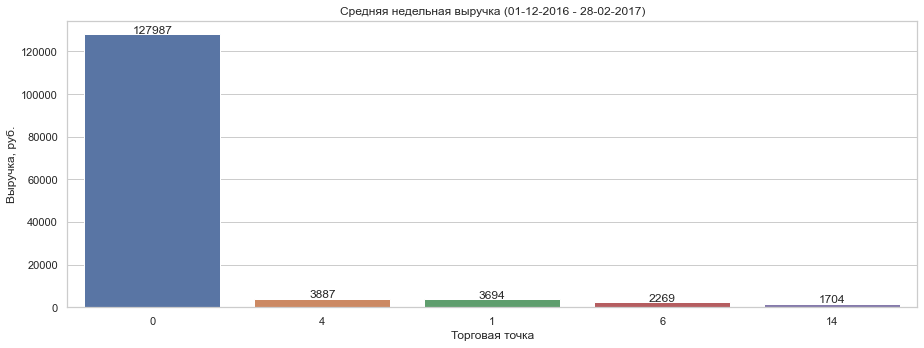

In [64]:
f, ax = plt.subplots(figsize=(13, 5))

labels = top_5['shop_id']

x = np.arange(len(labels))  
 
sns.barplot(x = x, y = week_revenue[top_5['shop_id']].mean().sort_values(ascending = False))

ax.set(xlabel = 'Торговая точка', ylabel = 'Выручка, руб.', 
       title = 'Средняя недельная выручка (01-12-2016 - 28-02-2017)')

ax.set_xticks(x)
ax.set_xticklabels(labels)

_show_values_on_bars(ax, 500, 0)

plt.tight_layout()

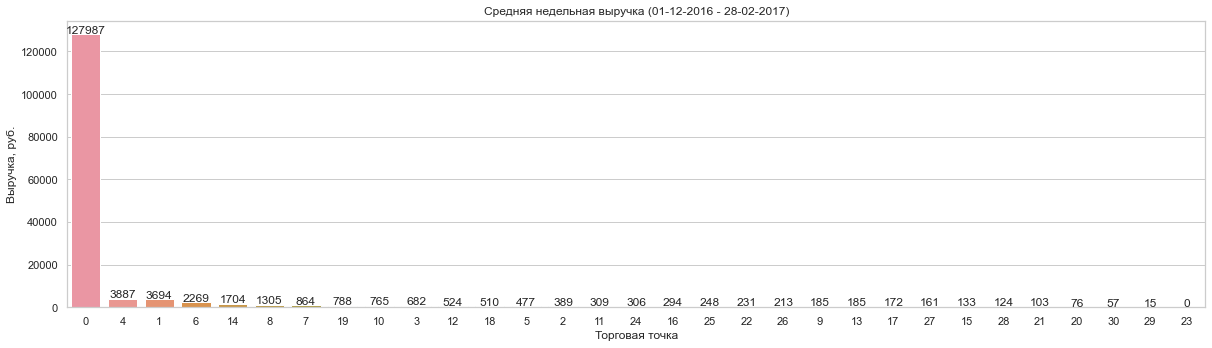

In [65]:
f, ax = plt.subplots(figsize=(17, 5))

labels = week_revenue.mean().sort_values(ascending = False).reset_index()['index']

x = np.arange(len(labels))  
 
sns.barplot(x = x, y = week_revenue.mean().sort_values(ascending = False))

ax.set(xlabel = 'Торговая точка', ylabel = 'Выручка, руб.', 
       title = 'Средняя недельная выручка (01-12-2016 - 28-02-2017)')

ax.set_xticks(x)
ax.set_xticklabels(labels)

_show_values_on_bars(ax, 500, 0)

plt.tight_layout()

---

Рассмотрим распределение количества покупок(чеков) для топ-5 точек сети за рассматриваемый период без учета возвратов.

In [66]:
check[(check['shop_id'].isin(top_5['shop_id'])) & (check['revenue'] > 0)].groupby('shop_id')['purchase_id'].count()

shop_id
0     3363
1       70
4       79
6       36
14       4
Name: purchase_id, dtype: int64

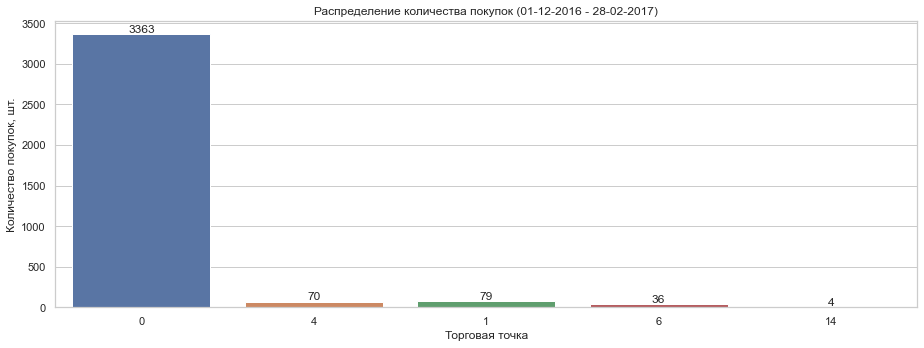

In [67]:
f, ax = plt.subplots(figsize=(13, 5))

labels = top_5['shop_id']

x = np.arange(len(labels))  
 
sns.barplot(x = x, 
    y = check[(check['shop_id'].isin(top_5['shop_id'])) & (check['revenue'] > 0)].groupby('shop_id')['purchase_id'].count())

ax.set(xlabel = 'Торговая точка', ylabel = 'Количество покупок, шт.', 
       title = 'Распределение количества покупок (01-12-2016 - 28-02-2017)')

ax.set_xticks(x)
ax.set_xticklabels(labels)

_show_values_on_bars(ax, 20, 0)

plt.tight_layout()

Количество покупок в точке 0 существенно (~ в 40 раз) превышает количество покупок в остальных точках.

---

Рассмотрим распределение стоимости покупок для топ-5 точек сети за рассматриваемый период без учета возвратов.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


count    3552.00
mean      541.92
std       829.43
min         0.39
25%       142.88
50%       318.42
75%       592.80
max      9969.21
Name: revenue, dtype: float64

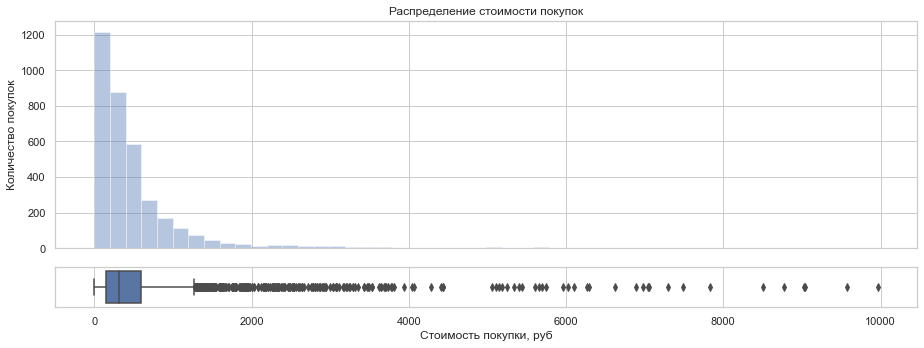

In [68]:
# гистограмма и диаграмма размаха распределения стоимости покупок (без учета возвратов)
f, axes = plt.subplots(2, figsize=(13, 5), sharex=True, gridspec_kw={"height_ratios": (.85, .15)})

sns.distplot(check[(check['shop_id'].isin(top_5['shop_id'])) & (check['revenue'] > 0)]['revenue'],
             kde = False, ax=axes[0])

sns.boxplot(check[(check['shop_id'].isin(top_5['shop_id'])) & (check['revenue'] > 0)]['revenue'], ax=axes[1])

axes[0].set(xlabel = '', ylabel = 'Количество покупок', title = 'Распределение стоимости покупок')
axes[1].set(xlabel = 'Стоимость покупки, руб', ylabel = '', title = '')

plt.tight_layout()

check[(check['shop_id'].isin(top_5['shop_id'])) & (check['revenue'] > 0)]['revenue'].describe().round(2)

Средняя стоимость покупки: 541.9 руб; медианная: 318.4 руб.

---

Вычислим среднее количество товаров в чеке для топ-5 точек сети за рассматриваемый период без учета возвратов.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


count    3552.00
mean      205.74
std       351.37
min         1.00
25%        47.00
50%       108.00
75%       222.00
max      5567.00
Name: quantity, dtype: float64

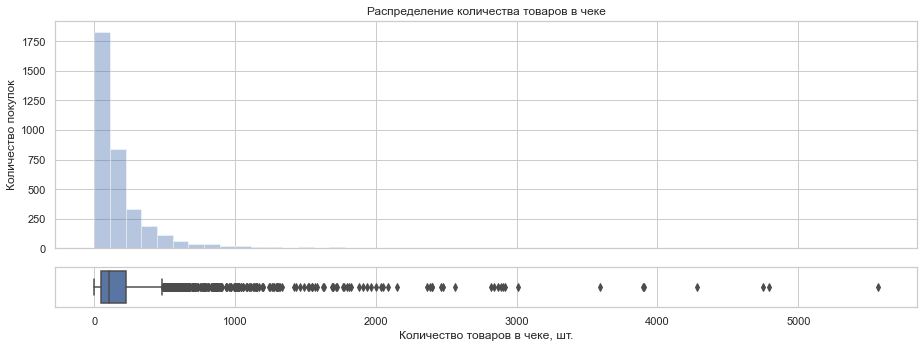

In [69]:
# гистограмма и диаграмма размаха распределения стоимости покупок (без учета возвратов)
f, axes = plt.subplots(2, figsize=(13, 5), sharex=True, gridspec_kw={"height_ratios": (.85, .15)})

sns.distplot(check[(check['shop_id'].isin(top_5['shop_id'])) & (check['revenue'] > 0)]['quantity'],
             kde = False, ax=axes[0])

sns.boxplot(check[(check['shop_id'].isin(top_5['shop_id'])) & (check['revenue'] > 0)]['quantity'], ax=axes[1])

axes[0].set(xlabel = '', ylabel = 'Количество покупок', title = 'Распределение количества товаров в чеке')
axes[1].set(xlabel = 'Количество товаров в чеке, шт.', ylabel = '', title = '')

plt.tight_layout()

check[(check['shop_id'].isin(top_5['shop_id'])) & (check['revenue'] > 0)]['quantity'].describe().round(2)

Среднее количество товаров в чеке: 205.7 шт; медианное: 108.0 шт.

---

Рассчитаем размер среднего чека без учета возвратов для каждой торговой точки из топ-5.

In [70]:
check[(check['shop_id'].isin(top_5['shop_id'])) & (check['revenue'] > 0)].groupby('shop_id')['revenue'].mean().round(2)

shop_id
0      524.58
1      694.50
4      680.37
6     1000.96
14    5586.51
Name: revenue, dtype: float64

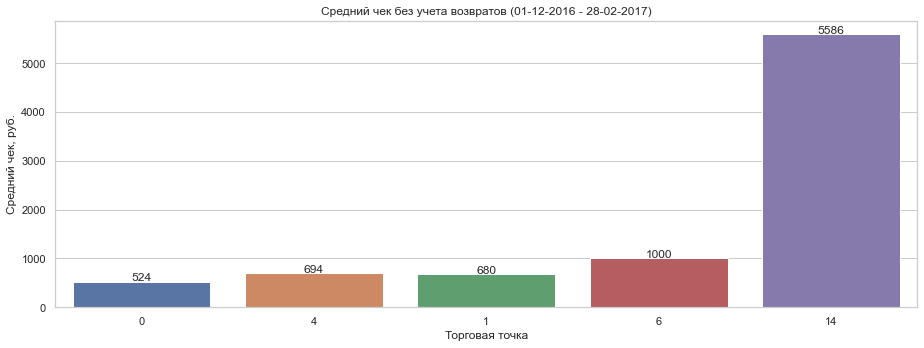

In [71]:
f, ax = plt.subplots(figsize=(13, 5))

labels = top_5['shop_id']

x = np.arange(len(labels))  
 
sns.barplot(x = x, 
            y = check[(check['shop_id'].isin(top_5['shop_id'])) & (check['revenue'] > 0)].groupby('shop_id')['revenue'].mean())

ax.set(xlabel = 'Торговая точка', ylabel = 'Средний чек, руб.', 
       title = 'Средний чек без учета возвратов (01-12-2016 - 28-02-2017)')

ax.set_xticks(x)
ax.set_xticklabels(labels)

_show_values_on_bars(ax, 20, 0)

plt.tight_layout()

Средний чек точки 14 примерно в 5 раз больше среднего чека остальных точек.

---

Построим график изменения среднего чека по дням для каждой из топ-5 торговых точек без учета возвратов.

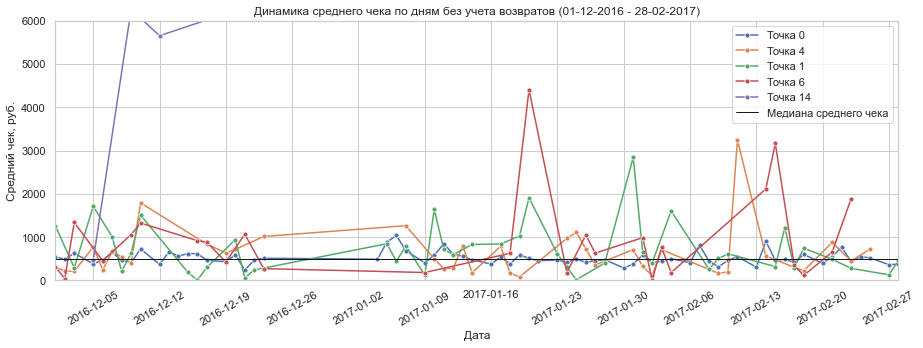

In [72]:
f, ax = plt.subplots(figsize=(13, 5))

for shop in list(top_5['shop_id']):

    sns.lineplot(x = check[(check['shop_id'] == shop) & (check['revenue'] > 0)]['date']
                          .sort_values(ascending = True).unique(), 
                 
                 y = check[(check['shop_id'] == shop) & (check['revenue'] > 0)]
                          .groupby('date')['revenue'].mean(), label = 'Точка '+str(shop), marker = 'o', markersize = 5)

ax.set(xlabel = 'Дата', ylabel = 'Средний чек, руб.', 
       title = 'Динамика среднего чека по дням без учета возвратов (01-12-2016 - 28-02-2017)',
       xlim = ('2016-12-01', '2017-02-28'), ylim = (0, 6000))

plt.xticks(rotation = 30, horizontalalignment = 'center')

date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval = 1))

ax.axhline(y=check[(check['shop_id'].isin(top_5['shop_id'])) & (check['revenue'] > 0)]
           .groupby('date')['revenue'].mean().median(),color='black', linestyle='-', linewidth = 0.9,
           label = 'Медиана среднего чека')

ax.legend()

plt.tight_layout()

Рассмотрим подробнее операции в точке 14.

In [73]:
check[check['shop_id'] == 14]

,purchase_id,revenue,quantity,shop_id,date,week,loyalty
462,537218,463.590,180,14,2016-12-05,2016-12-05,0
820,537899,6260.270,1487,14,2016-12-09,2016-12-05,0
1045,538397,5652.985,2361,14,2016-12-12,2016-12-12,0
3098,543179,0.000,0,14,2017-02-04,2017-01-30,0
3268,543518,9969.210,2914,14,2017-02-09,2017-02-06,0
4434,C540392,-192.730,-49,14,2017-01-06,2017-01-02,0


1. В точке 14 было совершено несколько крупных покупок, из-за этого у неё большой средний чек. 
2. В точках 1, 4, 6, 14 покупки совершаются не каждый день в отличии от точки 0.
3. На графике изменения среднего чека видим несколько крупных покупок в точках 1, 6, 4. Скорее всего из-за небольшого количества покупок в целом, отдельные дорогие покупки сильно влияют на средний чек этих торговых точек.
4. Самый маленький средний чек - в точке 0.
5. Из-за большого количества покупок в точке 0 средний чек для нее близок к общей медиане.

---

Построим график изменения среднего чека по неделям для каждой из топ-5 торговых точек без учета возвратов.

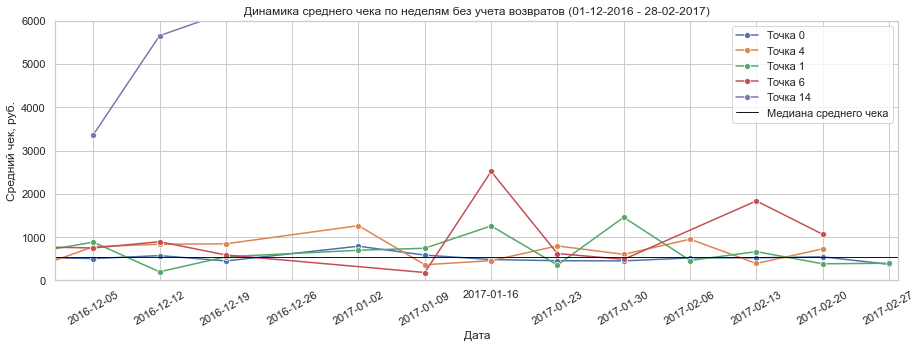

In [74]:
f, ax = plt.subplots(figsize=(13, 5))

for shop in list(top_5['shop_id']):

    sns.lineplot(x = check[(check['shop_id'] == shop) & (check['revenue'] > 0)]['week']
                          .sort_values(ascending = True).unique(), 
                 
                 y = check[(check['shop_id'] == shop) & (check['revenue'] > 0)]
                          .groupby('week')['revenue'].mean(), label = 'Точка '+str(shop), marker = 'o')

ax.set(xlabel = 'Дата', ylabel = 'Средний чек, руб.', 
       title = 'Динамика среднего чека по неделям без учета возвратов (01-12-2016 - 28-02-2017)',
       xlim = ('2016-12-01', '2017-02-28'), ylim = (0, 6000))

plt.xticks(rotation = 30, horizontalalignment = 'center')

date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval = 1))

ax.axhline(y=check[(check['shop_id'].isin(top_5['shop_id'])) & (check['revenue'] > 0)]
           .groupby('week')['revenue'].mean().median(),color='black', linestyle='-', linewidth = 0.9,
           label = 'Медиана среднего чека')

ax.legend()

plt.tight_layout()

1. Покупки в точках 1, 4, 6, 14 совершаются не каждую неделю.
2. Из-за небольшого количества покупок, отдельные дорогие покупки сильно влияют на средний чек торговой точки.

---

Рассчитаем размер среднего количества товаров в чеке без учета возвратов для каждой торговой точки из топ-5.

In [75]:
check[(check['shop_id'].isin(top_5['shop_id'])) & (check['revenue'] > 0)].groupby('shop_id')['quantity'].mean().round(2)

shop_id
0      200.37
1      257.36
4      235.18
6      372.44
14    1735.50
Name: quantity, dtype: float64

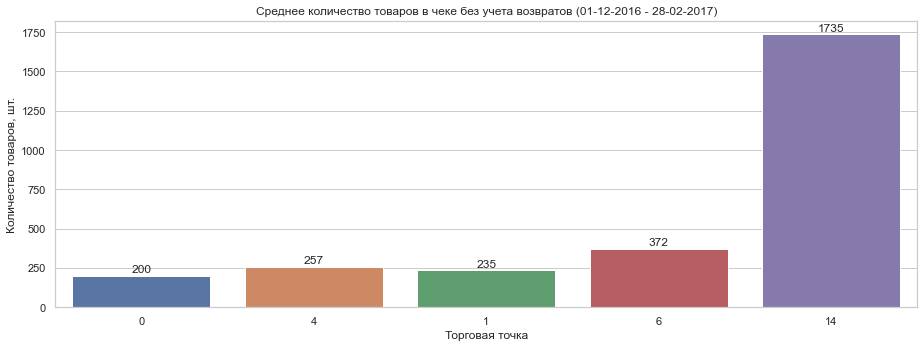

In [76]:
f, ax = plt.subplots(figsize=(13, 5))

labels = top_5['shop_id']

x = np.arange(len(labels))  
 
sns.barplot(x = x, 
            y = check[(check['shop_id'].isin(top_5['shop_id'])) & (check['revenue'] > 0)].groupby('shop_id')['quantity'].mean())

ax.set(xlabel = 'Торговая точка', ylabel = 'Количество товаров, шт.', 
       title = 'Среднее количество товаров в чеке без учета возвратов (01-12-2016 - 28-02-2017)')

ax.set_xticks(x)
ax.set_xticklabels(labels)

_show_values_on_bars(ax, 20, 0)

plt.tight_layout()

Построим график изменения среднего количества товаров в чеке для каждой из топ-5 торговых точек.

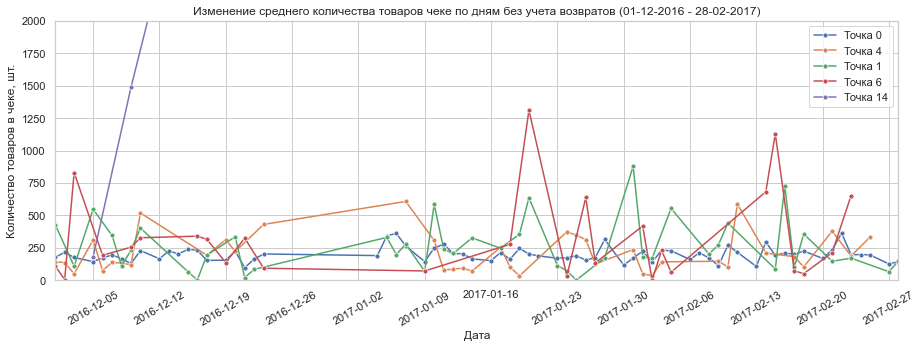

In [77]:
f, ax = plt.subplots(figsize=(13, 5))

for shop in list(top_5['shop_id']):

    sns.lineplot(x = check[(check['shop_id'] == shop) & (check['revenue'] > 0)]['date']
                          .sort_values(ascending = True).unique(), 
                 
                 y = check[(check['shop_id'] == shop) & (check['revenue'] > 0)]
                          .groupby('date')['quantity'].mean(), label = 'Точка '+str(shop), marker = 'o', markersize = 5)

ax.set(xlabel = 'Дата', ylabel = 'Количество товаров в чеке, шт.', 
       title = 'Изменение среднего количества товаров чеке по дням без учета возвратов (01-12-2016 - 28-02-2017)',
       xlim = ('2016-12-01', '2017-02-28'), ylim = (0, 2000))

plt.xticks(rotation = 30, horizontalalignment = 'center')

date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval = 1))

ax.legend()

plt.tight_layout()

1. В точке 1, 4, 6, 14 несколько покупок большого количества товаров.
2. Торговые точки имеют разный характер продаж: 
    - 14 продаёт нечасто, но в большом объёме и с большим средним чеком, возможно, это оптовая база; 
    - 1, 4, 6 продают в среднем большее количество товаров и с большим средним чеком, чем точка 0, это точки мелкооптовых продаж;
    - продажи в точке 0 постоянные, частые, но с относительно небольшим средним чеком, это точка розничных продаж.
3. Возможно разница в точках 0 и (1, 4, 6) может быть объяснена их расположением. Например, точка 0 расположена в городе: там большое количество покупателей и небольших покупок. А остальные точки расположены в малонаселенных районах, покупатели бывают там реже, но покупают большее количество товаров и на бóльшую сумму за раз.

---

Вычислим количество возвратов относённое к количеству покупок для каждой торговой точки. Будем рассматрировать только возвраты, совершенные после покупки (учтены в таблице с отрицательным количеством товара и с отрицательной стоимостью).

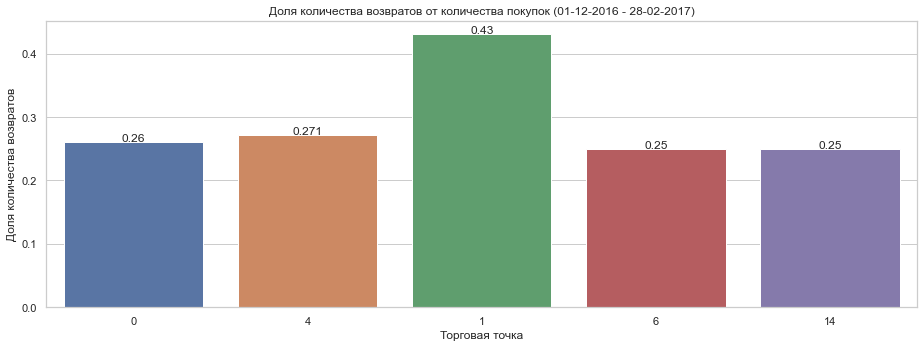

In [78]:
f, ax = plt.subplots(figsize=(13, 5))

labels = top_5['shop_id']

x = np.arange(len(labels))  
 
sns.barplot(x = x, 
     y = check[(check['shop_id'].isin(top_5['shop_id'])) & (check['revenue'] < 0)].groupby('shop_id')['revenue'].count()/
     check[(check['shop_id'].isin(top_5['shop_id'])) & (check['revenue'] > 0)].groupby('shop_id')['revenue'].count())

ax.set(xlabel = 'Торговая точка', ylabel = 'Доля количества возвратов', 
       title = 'Доля количества возвратов от количества покупок (01-12-2016 - 28-02-2017)')

ax.set_xticks(x)
ax.set_xticklabels(labels)

_show_values_on_bars(ax, 0.001, 3)

plt.tight_layout()

1. В торговой точке 1 самое большое количество возвратов относительно количества покупок- 43%.
2. В остальных торговых точках возвращают 25-27% покупок.

---

Вычислим стоимость возвратов относённую к стоимости покупок для каждой торговой точки. Будем рассматрировать только возвраты, совершенные после покупки (учтены в таблице с отрицательным количеством товара и с отрицательной стоимостью).

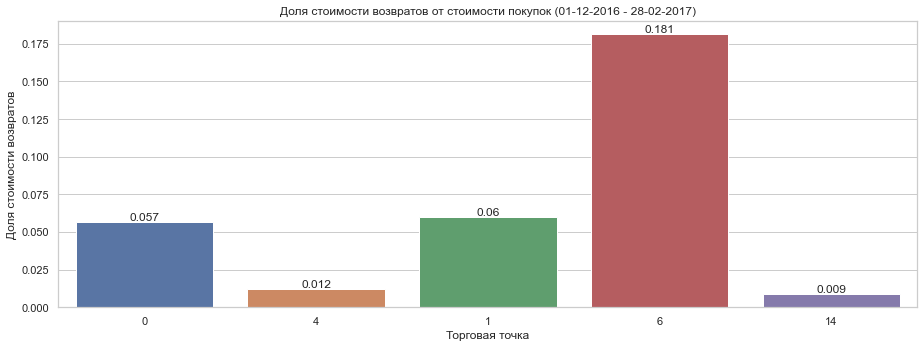

In [79]:
f, ax = plt.subplots(figsize=(13, 5))

labels = top_5['shop_id']

x = np.arange(len(labels))  
 
sns.barplot(x = x, 
            y = -check[(check['shop_id'].isin(top_5['shop_id'])) & (check['revenue'] < 0)].groupby('shop_id')['revenue'].sum()/
     check[(check['shop_id'].isin(top_5['shop_id'])) & (check['revenue'] > 0)].groupby('shop_id')['revenue'].sum())

ax.set(xlabel = 'Торговая точка', ylabel = 'Доля стоимости возвратов', 
       title = 'Доля стоимости возвратов от стоимости покупок (01-12-2016 - 28-02-2017)')

ax.set_xticks(x)
ax.set_xticklabels(labels)

_show_values_on_bars(ax, 0.001, 3)

plt.tight_layout()

1. В торговой точке 6 возвращают товаров примерно на 18% от стоимости покупок.
2. В торговых точках 0 и 1 возвращают около 6%.
3. В торговых точках 4 и 14 - около 1%.

---

Основная метрика для расчета эффективности - средняя недельная выручка с учетом возвратов. Топ-5 торговых точек по этой метрике:
1. Точка 0 - 127987 руб.;
1. Точка 4 - 3887 руб.;
1. Точка 1 - 3694 руб.;
1. Точка 6 - 2269 руб.;
1. Точка 14 - 1704 руб.

<a id="5"></a>
### 5.  Проверка статистических гипотез  [*(Оглавление)*](#contents)

Исследуем результаты работы программы лояльности.

Сформулируем нулевую гипотезу: "Средняя стоимость покупок лояльных покупателей равна средней стоимости покупок нелояльных покупателей".

In [80]:
# числовые характеристики распределения стоимости покупки нелояльных покупателей
check.query('loyalty == 0 and revenue >0')['revenue'].describe().round(2)

count    2565.00
mean      591.74
std       886.13
min         0.39
25%       148.60
50%       347.22
75%       641.13
max      9969.21
Name: revenue, dtype: float64

In [81]:
# числовые характеристики распределения стоимости покупки лояльных покупателей
check.query('loyalty == 1 and revenue >0')['revenue'].describe().round(2)

count    1116.00
mean      473.47
std       729.10
min         2.47
25%       143.50
50%       295.94
75%       531.19
max      9022.96
Name: revenue, dtype: float64

Имеем два набора чисел разного размера и с разной дисперсией (и разным стандартным отклонением). Для проверки нулевой гипотезы будем использовать двухвыборочный t-критерий для независимых выборок.

In [82]:
# поскольку дисперсии (и стандартные отклонения) для двух наборов не равны,
# изменим значение параметре equal_var, установленное по умолчанию
results = st.ttest_ind(
    check.query('loyalty == 0 and revenue >0')['revenue'], 
    check.query('loyalty == 1 and revenue >0')['revenue'], equal_var = False)

print('Средняя стоимость покупки лояльных покупателей:',
      round(check.query('loyalty == 1 and revenue >0')['revenue'].mean(), 2))
print('Средняя стоимость покупки ytлояльных покупателей:',
      round(check.query('loyalty == 0 and revenue >0')['revenue'].mean(), 2))
print('p-value:', results.pvalue)

Средняя стоимость покупки лояльных покупателей: 473.47
Средняя стоимость покупки ytлояльных покупателей: 591.74
p-value: 2.437879922885438e-05


Уровень статистической значимости p-value меньше критического (5%). Считаем, что нулевая гипотеза не подтвердилась, и средняя стоимость покупки лояльных покупателей (473.5) отличается от средней стоимости покупки нелояльных покупателей (591.8 руб.). 

---

Сформулируем нулевую гипотезу: "Количество возвратов относительно количества покупок у лояльных покупателей равно количеству возвратов относительно числа покупок у нелояльных покупателей".

Задача сравнения двух пропорций. Будем использовать z-тест.

In [83]:
# зададим критический уровень статистической значимости
alpha = .05 

# количество пользователей, совершивших событие
successes = np.array([check.query('loyalty == 1 and revenue < 0')['revenue'].count(), 
                     check.query('loyalty == 0 and revenue < 0')['revenue'].count()])

# исходное количество пользователей в группах
trials = np.array([check.query('loyalty == 1 and revenue > 0')['revenue'].count(), 
                     check.query('loyalty == 0 and revenue > 0')['revenue'].count()])

# доля пользователей, совершивших событие, в первой группе
p1 = successes[0]/trials[0]

# доля пользователей, совершивших событие, во второй группе
p2 = successes[1]/trials[1]
 
stat, pval = proportions_ztest(successes, trials)

if (pval < alpha):
    print('Доля возвратов лояльных покупателей:',p1.round(3), 
          '\nДоля возвратов нелояльных покупателей:' ,p2.round(3),
          '\np-value в z-тесте:', pval,
          '\nВывод: отвергаем нулевую гипотезу')
else:
    print('Доля возвратов лояльных покупателей:',p1.round(3), 
          '\nДоля возвратов нелояльных покупателей:' ,p2.round(3),
          '\np-value в z-тесте:', pval,
          '\nВывод: нет статистических различий')

Доля возвратов лояльных покупателей: 0.189 
Доля возвратов нелояльных покупателей: 0.294 
p-value в z-тесте: 2.504863974983154e-11 
Вывод: отвергаем нулевую гипотезу


Уровень статистической значимости p-value меньше критического (5%). Считаем, что нулевая гипотеза не подтвердилась, и доля возвратов у лояльных покупателей (18.9%) отличается от доли возвратов нелояльных покупателей (29.4%).

<a id="6"></a>
### 6.  Работа с документацией  [*(Оглавление)*](#contents) 

Кроме документации к библиотекам `matplotlib` и `seaborn`, кода предыдущих учебных проектов и теории из Яндекс.Практикума, в работе использовались следующие источники информации:

1.[**Описание работы функции proportions_ztest()**](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html)

Допустимые случаи применения z-теста, входные параметры и возвращаемый результат.

2.[**Описание работы функции ttest_ind()**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

Допустимые случаи применения t-теста, входные параметры и возвращаемый результат.

3.[**Ключевые показатели эффективности розничного магазина**](https://school.bigbird.ru/articles/klyuchevye-pokazateli-effektivnosti-roznichnogo-magazina/)

4.[**Анализ продаж розничного магазина – расчет показателей**](https://www.ekam.ru/blogs/pos/analiz-prodazh-magazina)

5.[**Эффективность использования торговых площадей**](https://znaytovar.ru/s/Effektivnost-ispolzovaniya-to.html)

Последние 3 источника на одну тему, и информация полученная из них была схожей: показатели эффективности торговых точек и розничных магазинов. Были использованы следующие метрики: 
- объём продаж; 
- средний чек; 
- количество возвратов; 
- количество чеков за день.


<a id="7"></a>
### 7.  Выводы и подготовка презентации  [*(Оглавление)*](#contents)

Презентация доступна по адресу:

https://yadi.sk/i/0SX4Otos5C-s2A

1. Суммарная выручка магазина 0 в ~30 раз больше суммарной выручки магазина 4 и остальных магазинов сети. Количество покупок в точке 0 ~в 40 раз превышает количество покупок в остальных точках.
1. Дневная выручка некоторых точек в некоторые дни отрицательная.
1. Средняя стоимость покупки: 541.9 руб; медианная: 318.4 руб.
1. Среднее количество товаров в чеке: 205.7 шт; медианное: 108.0 шт.
1. Средний чек точки 14 примерно в 5 раз больше среднего чека остальных точек. Самый маленький средний чек - в точке 0.
1. Торговые точки имеют разный характер продаж:
    - 14 продаёт нечасто, но в большом объёме и с большим средним чеком, возможно, это оптовая база;
    - 1, 4, 6 продают в среднем большее количество товаров и с большим средним чеком, чем точка 0, это точки мелкооптовых продаж;
    - продажи в точке 0 постоянные, частые, но с относительно небольшим средним чеком, это точка розничных продаж.
1. В торговой точке 1 самое большое количество возвратов относительно количества покупок- 43%. В остальных торговых точках возвращают 25-27% покупок
1. В торговой точке 6 возвращают товаров примерно на 18% от стоимости покупок. В торговых точках 0 и 1 возвращают около 6%. В торговых точках 4 и 14 - около 1%.
1. Средняя стоимость покупки лояльных покупателей (473.5 руб.) отличается от средней стоимости покупки нелояльных покупателей (591.8 руб.).
1. Доля возвратов у лояльных покупателей (18.9%) отличается от доли возвратов нелояльных покупателей (29.4%).
1. Основная метрика для оценки эффективности: средняя недельная выручка торговой точки с учетом стоимости возвратов.